## 参考CSDN的帖子进行学习，地址如下：https://blog.csdn.net/leida_wt/article/details/88743323#_15

In [1]:
import pandas as pd
train = pd.read_csv('Titanic-Data/train.csv')
test = pd.read_csv('Titanic-Data/test.csv')

full=pd.concat([train,test],ignore_index=True)

In [2]:
full.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
full['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [6]:
# Embarked 共有889个数据，2个取值为空，特征取值为 S 664; C 168; Q 77 因此采取众数的填充方法
full['Embarked'].fillna('S',inplace=True)
# train.info()  # Embarked     891 non-null    object

In [7]:
# Cabin        204 non-null    object 缺失严重，有船舱号的为1，没有船舱信息的为0
full.loc[full.Cabin.notnull(),'Cabin']=1
full.loc[full.Cabin.isnull(),'Cabin']=0

In [8]:
full.Fare.fillna(full[full.Pclass==3]['Fare'].median(),inplace=True)

In [9]:
# loc[]，中的参数，为一列 bool 的array。或者具体的行名称名称， 二维参数为：列名称
full.loc[full.Cabin.notnull(),'Cabin']=1
full.loc[full.Cabin.isnull(),'Cabin']=0
full.loc[full['Sex']=='male','Sex']=1
full.loc[full['Sex']=='female','Sex']=0

In [10]:
full['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [11]:
# 以,号切分选取后面的字符，紧接着用 . 切分选取前面部分，最后去除全部字符，如前后空格逗号等。
full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [12]:
full['Title']=full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

# map()函数可以用于Series对象或DataFrame对象的一列，接收函数作为或字典对象作为参数，返回经过函数或字典映射处理后的值。

full.Title=full.Title.map(nn)
# assign the female 'Dr' to 'Rarewoman'
full.loc[full.PassengerId==797,'Title']='Rarewoman'
full.Age.fillna(999,inplace=True)
def girl(aa):
    if (aa.Age!=999)&(aa.Title=='Miss')&(aa.Age<=14):
        return 'Girl'
    elif (aa.Age==999)&(aa.Title=='Miss')&(aa.Parch!=0):
        return 'Girl'
    else:
        return aa.Title


In [13]:
# 回到主题， pandas 的 apply() 函数可以作用于 Series 或者整个 DataFrame，功能也是自动遍历整个 Series 或者 DataFrame, 对每一个元素运行指定的函数。
full['Title']=full.apply(girl,axis=1)

In [14]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.Age==999)&(full.Title==i),'Age']=full.loc[full.Title==i,'Age'].median()

full.loc[full['Age']<=15,'Age']=0
full.loc[(full['Age']>15)&(full['Age']<55),'Age']=1
full.loc[full['Age']>=55,'Age']=2
full['Pclass']=full['Pclass']-1


In [15]:
'''
dataframe的切片取值方法一：
    full.iloc[0,3]             index location 参数必须为：int
    full.loc[0,'Name']         location 参数必须为： 行和列的具体名称或者 boolean的array

dataframe的切片取值方法二：仅对整列取值有此方法——  返回 pandas.core.series.Series 对象。
    dataframe.column_name
    dataframe['column_name']
'''

"\ndataframe的切片取值方法一：\n    full.iloc[0,3]             index location 参数必须为：int\n    full.loc[0,'Name']         location 参数必须为： 行和列的具体名称或者 boolean的array\n\ndataframe的切片取值方法二：仅对整列取值有此方法——  返回 pandas.core.series.Series 对象。\n    dataframe.column_name\n    dataframe['column_name']\n"

In [16]:
'''
总结如下：
PassengerId => 乘客ID
Pclass => 客舱等级(1/2/3等舱位)
Name => 乘客姓名
Sex => 性别 清洗成male=1 female=0
Age => 年龄 插补后分0,1,2 代表 幼年（0-15） 成年（15-55） 老年（55-）
SibSp => 兄弟姐妹数/配偶数
Parch => 父母数/子女数
Ticket => 船票编号
Fare => 船票价格 经聚类变0 1 2 代表少 多 很多
Cabin => 客舱号 清洗成有无此项，并发现有的生存率高，有船舱号的为1，没有船舱信息的为0
Embarked => 登船港口 清洗na,填S
'''


'\n总结如下：\nPassengerId => 乘客ID\nPclass => 客舱等级(1/2/3等舱位)\nName => 乘客姓名\nSex => 性别 清洗成male=1 female=0\nAge => 年龄 插补后分0,1,2 代表 幼年（0-15） 成年（15-55） 老年（55-）\nSibSp => 兄弟姐妹数/配偶数\nParch => 父母数/子女数\nTicket => 船票编号\nFare => 船票价格 经聚类变0 1 2 代表少 多 很多\nCabin => 客舱号 清洗成有无此项，并发现有的生存率高，有船舱号的为1，没有船舱信息的为0\nEmbarked => 登船港口 清洗na,填S\n'

In [17]:
from sklearn.cluster import KMeans
Fare=full['Fare'].values
Fare=Fare.reshape(-1,1)
km = KMeans(n_clusters=3).fit(Fare)   #将数据集分为2类
Fare = km.fit_predict(Fare)
full['Fare']=Fare
full['Fare']=full['Fare'].astype(int)
full['Age']=full['Age'].astype(int)
full['Cabin']=full['Cabin'].astype(int)
full['Pclass']=full['Pclass'].astype(int)
full['Sex']=full['Sex'].astype(int)
#full['Survived']=full['Survived'].astype(int)
dataset=full.drop(columns=['Embarked','Name','Parch','PassengerId','SibSp','Ticket','Title'])
dataset.dropna(inplace=True)
dataset['Survived']=dataset['Survived'].astype(int)
#dataset=pd.concat([dataset, pd.DataFrame(columns=['Pri'])])
train=dataset[:800]
test=dataset[800:]
'''
最后保留如下项目,并切出800的训练集：
Pclass => 客舱等级(0/1/2等舱位)
Sex => 性别 male=1 female=0
Age => 年龄 插补后分0,1,2 代表 幼年（0-15） 成年（15-55） 老年（55-）
Fare => 船票价格 经聚类变0 1 2 代表少 多 很多
Cabin => 客舱号 清洗成有无此项，并发现有的生存率高
'''

'\n最后保留如下项目,并切出800的训练集：\nPclass => 客舱等级(0/1/2等舱位)\nSex => 性别 male=1 female=0\nAge => 年龄 插补后分0,1,2 代表 幼年（0-15） 成年（15-55） 老年（55-）\nFare => 船票价格 经聚类变0 1 2 代表少 多 很多\nCabin => 客舱号 清洗成有无此项，并发现有的生存率高\n'

# 构建模型

In [18]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

#model = BayesianNetwork([('Age', 'Pri'), ('Sex', 'Pri'),('Pri','Survived'),('Fare','Pclass'),('Pclass','Survived'),('Cabin','Survived')])
model = BayesianNetwork([('Age', 'Survived'), ('Sex', 'Survived'),('Fare','Pclass'),('Pclass','Survived'),('Cabin','Survived')])


![Titanic-结构](./BN-Titanic-structure.png)

In [19]:
import daft
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

<Axes:>

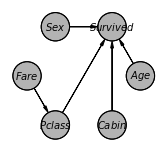

In [21]:
model_plot = model.to_daft()
model_plot.render()

# 模型参数构建

确定网络的参数，也就是各个边上的条件概率, 若手工填入，可这样写
![条件概率](./BN-Titanic-CPD.png)

In [22]:
# mfrom pgmpy.factors.discrete import TabularCPD
# # 构建CPD表格
# my_cpd = TabularCPD(variable='pclass', variable_card=3, values=[[0.65, 0.3], [0.30, 0.6], [0.05, 0.1]],
#                     evidence=['Fare'], evidence_card=[2])

In [23]:
# # 填入cpd表
# model.add_cpds(my_cpd)
# # 执行检查（可选，用于检查cpd是否填错）
# cancer_model.check_model()

# 使用贝叶斯估计器

In [24]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,2,1,1,0,1
1,1,0,0,1,2,1
2,1,2,0,1,0,1
3,1,0,0,1,2,1
4,0,2,1,1,0,1
...,...,...,...,...,...,...
795,0,1,1,1,0,1
796,1,0,0,1,0,1
797,1,2,0,1,0,1
798,0,2,1,1,0,1


In [25]:
# 一起全部进行估计
model.fit(train, estimator=BayesianEstimator, prior_type='BDeu', n_jobs=2)
'''
estimator = BayesianEstimator(model, data)
cpd_c = estimator.estimate_cpd('C', prior_type = 'dirichlet', pseudo_counts=[1, 2])
model.add_cpds(cpd_c)
参数如下：
    当prior_type=‘BDeu’ 就表示选择了一个equivalent_sample_size=5的无差别客观先验，认定各个概率相等，不提供信息，但并不是没用，这个先验起到了类似神经网络里头控制过拟合的正则项的作用。
    当prior_type='dirichlet’表示选择一般的狄利克雷分布，这时候要主动填入[α1，α2…αi]
    当prior_type= ‘K2’ 意为 ‘dirichlet’ + setting every pseudo_count to 1
'''

"\nestimator = BayesianEstimator(model, data)\ncpd_c = estimator.estimate_cpd('C', prior_type = 'dirichlet', pseudo_counts=[1, 2])\nmodel.add_cpds(cpd_c)\n参数如下：\n    当prior_type=‘BDeu’ 就表示选择了一个equivalent_sample_size=5的无差别客观先验，认定各个概率相等，不提供信息，但并不是没用，这个先验起到了类似神经网络里头控制过拟合的正则项的作用。\n    当prior_type='dirichlet’表示选择一般的狄利克雷分布，这时候要主动填入[α1，α2…αi]\n    当prior_type= ‘K2’ 意为 ‘dirichlet’ + setting every pseudo_count to 1\n"

In [26]:
'''
这里记录一个bug：pgmpy目前将离散变量命名限制为从0开始，所以本例子里的Pclass 项从（1/2/3等级）都减一处理成了（0/1/2等级）以解决此问题。

dirichlet也可在fit函数里使用，只要传入pseudo_counts字典即可，如下面这样
pseudo_counts = {'D': [300, 700], 'I': [500, 500], 'G': [800, 200], 'L': [500, 500], 'S': [400, 600]}
model.fit(data, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=pseudo_counts)
'''

"\n这里记录一个bug：pgmpy目前将离散变量命名限制为从0开始，所以本例子里的Pclass 项从（1/2/3等级）都减一处理成了（0/1/2等级）以解决此问题。\n\ndirichlet也可在fit函数里使用，只要传入pseudo_counts字典即可，如下面这样\npseudo_counts = {'D': [300, 700], 'I': [500, 500], 'G': [800, 200], 'L': [500, 500], 'S': [400, 600]}\nmodel.fit(data, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=pseudo_counts)\n"

推理
首先可以通过一些方法查看模型

In [27]:
#输出节点信息
print(model.nodes())
#输出依赖关系
print(model.edges())
#查看某节点概率分布
print(model.get_cpds('Pclass'))


['Age', 'Survived', 'Sex', 'Fare', 'Pclass', 'Cabin']
[('Age', 'Survived'), ('Sex', 'Survived'), ('Fare', 'Pclass'), ('Pclass', 'Survived'), ('Cabin', 'Survived')]
+-----------+---------------------+----------------------+---------------------+
| Fare      | Fare(0)             | Fare(1)              | Fare(2)             |
+-----------+---------------------+----------------------+---------------------+
| Pclass(0) | 0.09599317988064791 | 0.9487179487179486   | 0.8624472573839663  |
+-----------+---------------------+----------------------+---------------------+
| Pclass(1) | 0.24484228473998296 | 0.025641025641025637 | 0.05738396624472574 |
+-----------+---------------------+----------------------+---------------------+
| Pclass(2) | 0.6591645353793691  | 0.025641025641025637 | 0.08016877637130802 |
+-----------+---------------------+----------------------+---------------------+


## 推断

贝叶斯网络推理分成：
1.后验概率问题：
2.最大后验假设问题（MAP）：
3.最大可能解释问题（MPE）

贝叶斯网络推理主要有两类方法，精确推理（变量化简Variable Elination和置信传播）和近似推理(如mcmc采样)，一般精确推理足以解决

pgmpy解决1可以用query函数 解决2，3可以用map_query函数
通过这些查询可以获得我们感兴趣的关于因果关系信息，这是贝叶斯网络模型的一大优势。此处的因果关系并不可以解释为一般意义上的逻辑因果，而是表示一种概率上的相关

#### 逐条预测

In [28]:
from pgmpy.inference import VariableElimination
model_infer = VariableElimination(model)
q = model_infer.query(variables=['Survived'], evidence={'Fare': 0})
print(q)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-------------+-----------------+
| Survived    |   phi(Survived) |
+=============+=================+
| Survived(0) |          0.6498 |
+-------------+-----------------+
| Survived(1) |          0.3502 |
+-------------+-----------------+


In [29]:
q = model_infer.map_query(variables=['Fare','Age','Sex','Pclass','Cabin'], evidence={'Survived': 1})
print(q)  #{'Sex': 0, 'Fare': 0, 'Age': 1, 'Pclass': 2, 'Cabin': 0}

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'Fare': 0, 'Age': 1, 'Sex': 0, 'Pclass': 2, 'Cabin': 1}


### 针对 DataFrame 一起推断

In [30]:
predict_data=test.drop(['Survived'],axis=1)
y_pred = model.predict(predict_data, n_jobs=2)
y_pred

  0%|          | 0/16 [00:00<?, ?it/s]

D:\Anaconda\envs\pytorch-cpu\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


,Survived
0,0
1,1
2,1
3,0
4,0
...,...
86,0
87,1
88,0
89,0


In [31]:
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>


In [32]:
y_pred.Survived==test.Survived.reset_index(drop=True)

0      True
1      True
2      True
3     False
4     False
      ...  
86     True
87     True
88     True
89    False
90     True
Name: Survived, Length: 91, dtype: bool

In [33]:
print('测试集精度为: ', format((y_pred['Survived']==test['Survived'].reset_index(drop=True)).sum()/len(test)))

测试集精度为:  0.8241758241758241


# 结构学习---自动设计网络结构

自动设计网络结构的核心问题有两个，一个是评价网络好坏的指标，另一个是查找的方法.利用启发式方法或是限定搜索条件以减少搜索空间. Score-based Structure Learning 与 constraint-based structure learning以及他们的结合 hybrid structure learning.

先尝试对特定的几个模型进行逐一比较，其相应的评分函数得得分

In [34]:
'''
Score-based Structure Learning 依赖于评分函数，常用的有bdeu k2 bic，更合理的网络评分更高.
'''
# 随机产生x y 并令z=x+y, 显然X -> Z <- Y的结构合理
import numpy as np
import pandas as pd
from pgmpy.estimators import BDeuScore, K2Score, BicScore
from pgmpy.models import BayesianNetwork

# 创建数据
data = pd.DataFrame(data=np.random.randint(0, 3, size=(5000, 2)), columns=['X', 'Y'])
data['Z'] = data['X'] + data['Y']


# 评分函数需要数据才能进行实例化
bdeu = BDeuScore(data, equivalent_sample_size=5)
k2 = K2Score(data)
bic = BicScore(data)

# 先天的创建两个模型----构建要评价的模型搜索空间。
model1 = BayesianNetwork([('X', 'Z'), ('Y', 'Z')])  # X -> Z <- Y
model2 = BayesianNetwork([('X', 'Z'), ('X', 'Y')])  # Y <- X -> Z

# 得出相应的评分
print(bdeu.score(model1))
print(k2.score(model1))
print(bic.score(model1))
print('=====以下是模型二得到的评分=====')
print(bdeu.score(model2))
print(k2.score(model2))
print(bic.score(model2))

-11038.005484116657
-11197.917714285868
-11153.940749844356
=====以下是模型二得到的评分=====
-16540.997849827254
-16556.942744934302
-16558.188306546155


由此得出，模型一的评分比模型二的评分高，模型一更加的好。

## 自动搜索、比较得接口为：爬山算法（贪婪算法）

In [35]:
# 爬山算法（一个贪婪算法）pympy的实现如下
import daft
from pgmpy.estimators import HillClimbSearch

# 创建模型结构学习的依赖数据
data = pd.DataFrame(data=np.random.randint(0, 3, size=(5000, 8)), columns=list('ABCDEFGH'))

data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']

hc = HillClimbSearch(data)
best_model = hc.estimate()
print(best_model)
print(best_model.edges())
print(type(best_model))

  0%|          | 0/1000000 [00:00<?, ?it/s]

DAG with 8 nodes and 6 edges
[('A', 'C'), ('A', 'B'), ('A', 'G'), ('C', 'B'), ('H', 'A'), ('H', 'G')]
<class 'pgmpy.base.DAG.DAG'>


<Axes:>

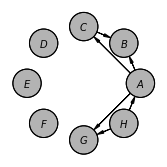

In [36]:
best_model.to_daft().render()  # 由此可知通过 爬山算法 贪婪搜索的网络结构 如下图：并没有全部采用所有节点。

# Constraint-based Structure Learning 根据独立性得到最优结构的方法，相对来讲前一种更有效
# 根据独立性得到最优结构的方法，相对来讲前一种更有效
from pgmpy.estimators import PC
from pgmpy.independencies import Independencies

# build skeleton from list of independencies:
ind = Independencies(['B', 'C'],
                     ['A', ['B', 'C'], 'D'])  # 表示B 和 C 节点相互独立。

# 我们需要计算闭包，否则这组独立性就不承认一个忠实的表示:
ind = ind.closure()
skel, sep_sets = PC(independencies=ind).build_skeleton(ind, n_jobs=1)

print(skel.edges())

# 树搜索

In [37]:
import numpy as np
import pandas as pd
from pgmpy.estimators import TreeSearch
values = pd.DataFrame(np.random.randint(low=0, high=2, size=(1000, 5)),
                      columns=['A', 'B', 'C', 'D', 'E'])
est = TreeSearch(values, root_node='B')
model = est.estimate(estimator_type='chow-liu')

Building tree:   0%|          | 0/10.0 [00:00<?, ?it/s]

<Axes:>

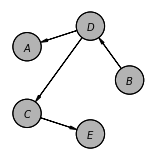

In [38]:
model.to_daft().render()